#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


###  We have 13 columns and 148654 row, 'notes' and 'status' columns are null so we can drop them. 'basepay','overtimepay','otherpay','benefits' have some null values (we will replace those null values in the preprocessing part). the rest of the columns are okay with no null values 
### the type of each column is written in the 'Dtype' part in the previous cell. 8 columns are float, 2 are int, and 3 are object.

In [4]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


### in the previous cell we can conclude that: 
1. we counted the mean,min,std,max for each cell. for example: 'ID' the mean is 74327.5 and the min is 1
2. max basepay (salary) is 319275.01, min is -166.01 so the range of salaries is [-166.01,319275.01 ]. mean is 66325.44 


### Calculating The Salary Statistics Manually :

In [7]:
range_Salary = df.BasePay.max()-df.BasePay.min()
range_Salary

319441.02

In [5]:
df.BasePay.mode() #If there's no repeated value in the salart, so there is no mode

0    0.0
Name: BasePay, dtype: float64

In [6]:
df.BasePay.median() 

65007.45

In [8]:
df.BasePay.std()

42764.63549525958

# Data Preprocessing And Cleaning:

## First : Drop Unneeded Columns

In [10]:
df.drop(['Notes','Status'],inplace= True , axis=1) # we are dropping all the column because all the values are null 
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


## Second : Replace values in the other columns:

### to handle those missing values we have two choices : 1. we can replace with mean 2. or we can drop the rows with nan values as those rows are small compared to the total number of rows in the dataset

###  let's drop the values in 'basepay','overtimepay','otherpay' as they are very small (only 4 missing values in  'overtimepay', 'otherpay' )

In [18]:
df.dropna(subset=['BasePay','OvertimePay','OtherPay'], inplace= True)
df.sample(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
79199,79200,Joseph A Molinari,Senior Comm Systems Technican,127116.00,1177.00,40.02,38277.41,128333.02,166610.43,2013,San Francisco
27013,27014,THE DAC TRAN,SHERIFF'S CADET,34853.40,2175.49,500.00,NaN,37528.89,37528.89,2011,San Francisco
97754,97755,Ramon R Jemera,Transit Operator,42837.62,14253.87,1041.09,21217.95,58132.58,79350.53,2013,San Francisco
56789,56790,Francisco Suarez,Sewer Maintenance Worker,56758.90,6129.45,1577.21,28235.57,64465.56,92701.13,2012,San Francisco
30475,30476,ANA BARRIOS,SENIOR LEGAL PROCESS CLERK,13923.36,0.00,320.00,NaN,14243.36,14243.36,2011,San Francisco


### Replace the values in Benefits with mean as the missing values in 'benefits' are too many to be dropped 

In [19]:
df['Benefits'].fillna(df['Benefits'].mean(), inplace= True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148045 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148045 non-null  int64  
 1   EmployeeName      148045 non-null  object 
 2   JobTitle          148045 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148045 non-null  float64
 5   OtherPay          148045 non-null  float64
 6   Benefits          148045 non-null  float64
 7   TotalPay          148045 non-null  float64
 8   TotalPayBenefits  148045 non-null  float64
 9   Year              148045 non-null  int64  
 10  Agency            148045 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


### Conclusion of the Cleaning: 
1. Dropped 2 columns with only nan values
2. dropped the rows with nan values in 3 columns ( we could have replaced it with mean just like what we did with 'Benefits')
3. replaced the nan values with mean in 1 column

# Visualization

### distribution of salaries

C:\Users\pc\AppData\Local\Temp\ipykernel_12720\612116116.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.histplot(df['BasePay'],bins =30,kde=True,palette='viridis',linewidth=1.2, alpha=0.6)


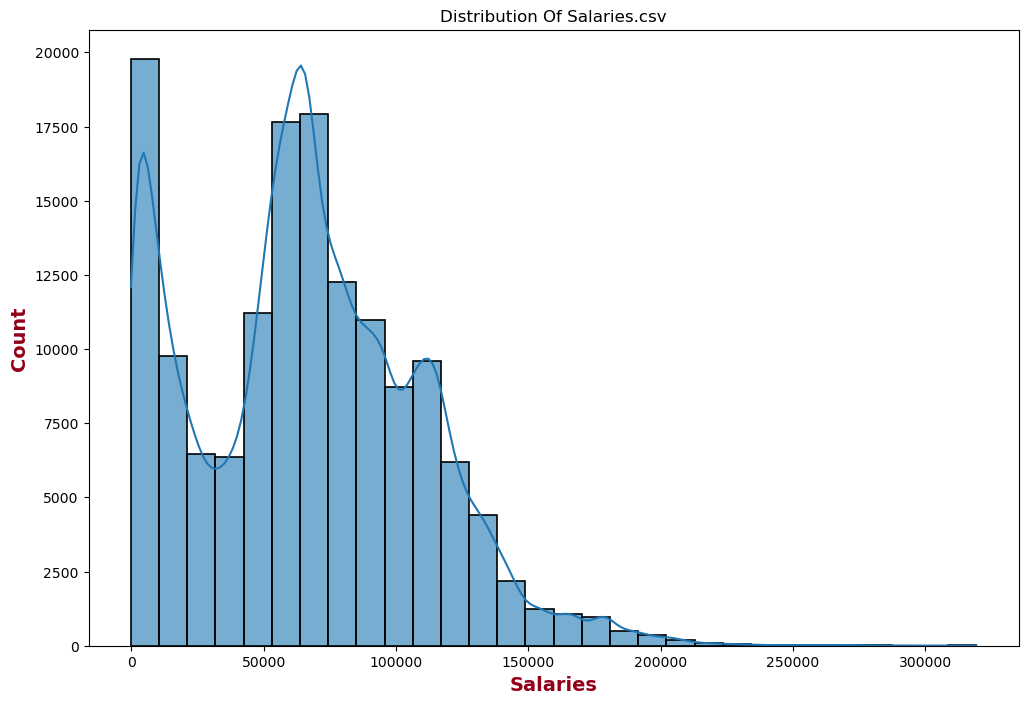

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(12,8))

sn.histplot(df['BasePay'],bins =30,kde=True,palette='viridis',linewidth=1.2, alpha=0.6)
plt.xlabel('Salaries',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.title('Distribution Of Salaries.csv')
plt.show()

### proportion of employees in top 8 departments.

In [22]:
df['JobTitle'].value_counts()

Transit Operator                         6975
Special Nurse                            4382
Registered Nurse                         3725
Public Svc Aide-Public Works             2514
Police Officer 3                         2411
                                         ... 
PRINCIPAL INVESTIGATOR, TAX COLLECTOR       1
BUILDING SERVICES TECHNICIAN                1
TRIAL DELAY REDUCTION COORDINATOR           1
POWERHOUSE ELECTRICIAN SUPERVISOR II        1
Cashier 3                                   1
Name: JobTitle, Length: 2154, dtype: int64

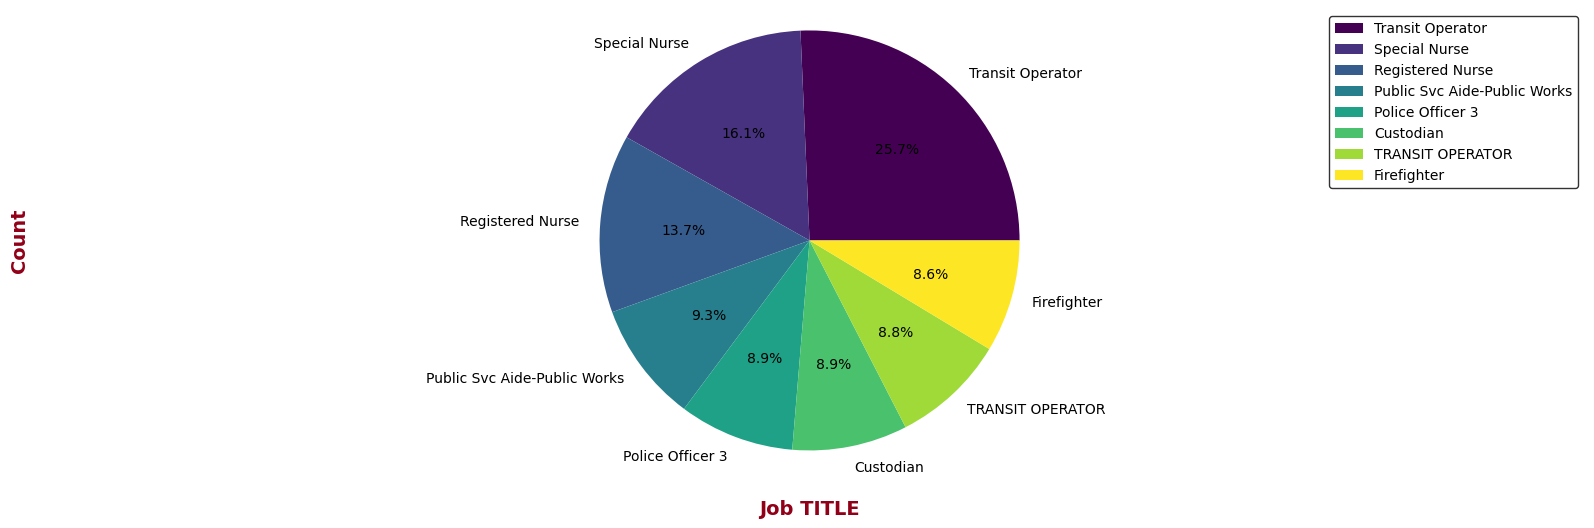

In [26]:
plt.figure(figsize = (20,6))
count = df.JobTitle.value_counts()[:8]
count.plot(kind='pie', colormap='viridis', autopct='%.1f%%')
plt.xlabel('\nJob TITLE',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.axis('equal')
legend = plt.legend(labels=count.index, loc='best')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
plt.show()

## Group By Job Title

In [28]:
grouped_by_jobtitle=df.groupby('JobTitle')
grouped_by_jobtitle.describe()

Id                 \
                                                count           mean   
JobTitle                                                               
ACCOUNT CLERK                                    83.0   25734.819277   
ACCOUNTANT                                        5.0   24159.200000   
ACCOUNTANT INTERN                                48.0   28128.833333   
ACPO,JuvP, Juv Prob (SFERS)                       1.0  135284.000000   
ACUPUNCTURIST                                     1.0   18379.000000   
...                                               ...            ...   
X-RAY LABORATORY AIDE                            26.0   22502.076923   
X-Ray Laboratory Aide                           100.0   98890.620000   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    1.0   23392.000000   
Youth Comm Advisor                                4.0   99677.750000   
ZOO CURATOR                                       1.0   18779.000000   

                                                                        \
                                                         std       min   
JobTitle                                                                 
ACCOUNT CLERK                                    2621.592874   20766.0   
ACCOUNTANT                                       6787.702608   19264.0   
ACCOUNTANT INTERN                                3941.782388   21536.0   
ACPO,JuvP, Juv Prob (SFERS)                              NaN  135284.0   
ACUPUNCTURIST                                            NaN   18379.0   
...                                                      ...       ...   
X-RAY LABORATORY AIDE                            4694.321369   12940.0   
X-Ray Laboratory Aide                           31404.565120   49777.0   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS           NaN   23392.0   
Youth Comm Advisor                              32595.496267   58843.0   
ZOO CURATOR                                              NaN   18779.0   

                                                                     \
                                                      25%       50%   
JobTitle                                                              
ACCOUNT CLERK                                    24581.00   24774.0   
ACCOUNTANT                                       19325.00   20993.0   
ACCOUNTANT INTERN                                23325.75   29979.5   
ACPO,JuvP, Juv Prob (SFERS)                     135284.00  135284.0   
ACUPUNCTURIST                                    18379.00   18379.0   
...                                                   ...       ...   
X-RAY LABORATORY AIDE                            19632.75   20927.0   
X-Ray Laboratory Aide                            65829.00   98379.5   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS   23392.00   23392.0   
Youth Comm Advisor                               88267.00  100704.5   
ZOO CURATOR                                      18779.00   18779.0   

                                                                    BasePay  \
                                                      75%       max   count   
JobTitle                                                                      
ACCOUNT CLERK                                    26299.50   35638.0    83.0   
ACCOUNTANT                                       25928.00   35286.0     5.0   
ACCOUNTANT INTERN                                31639.25   34267.0    48.0   
ACPO,JuvP, Juv Prob (SFERS)                     135284.00  135284.0     1.0   
ACUPUNCTURIST                                    18379.00   18379.0     1.0   
...                                                   ...       ...     ...   
X-RAY LABORATORY AIDE                            24165.75   33182.0    26.0   
X-Ray Laboratory Aide                           130540.75  143632.0   100.0   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS   23392.00   23392.0     1.0   
Youth Comm Advisor                              112115.25  138

In [40]:
mean_salary_each_job=grouped_by_jobtitle['BasePay'].mean().sort_values(ascending = False)[0:8]
mean_salary_each_job

JobTitle
Chief of Police                           309767.683333
Chief, Fire Department                    304232.340000
Gen Mgr, Public Trnsp Dept                297769.413333
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000000
Dep Dir for Investments, Ret              276153.765000
Mayor                                     275852.530000
Adm, SFGH Medical Center                  265218.780000
EXECUTIVE CONTRACT EMPLOYEE               264452.520000
Name: BasePay, dtype: float64

## Jobs With the top 8 mean salaries 

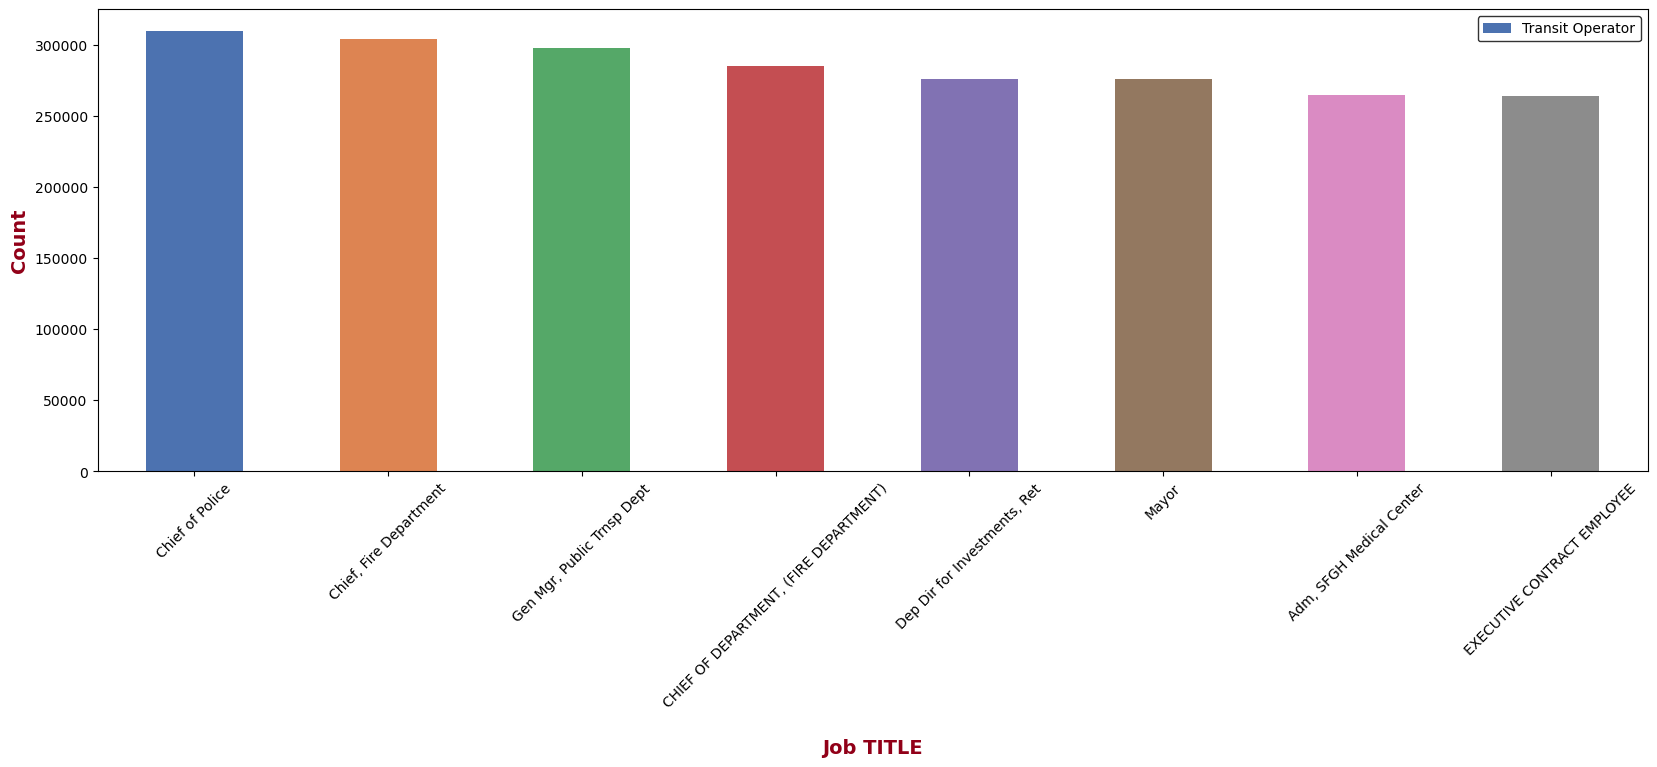

In [43]:
plt.figure(figsize = (20,6))
mean_salary_each_job.plot(kind='bar', color = sn.color_palette('deep'))
plt.xlabel('\nJob TITLE',weight = 'bold', color = '#910018', fontsize = 14)
plt.ylabel('Count',weight = 'bold', color = '#910018', fontsize = 14)
plt.xticks(rotation =45)
legend = plt.legend(labels=count.index, loc='best')
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
plt.show()

### we conclude that Chief of Police Job has the highest salaries

## correlation between salary and TotalPay column

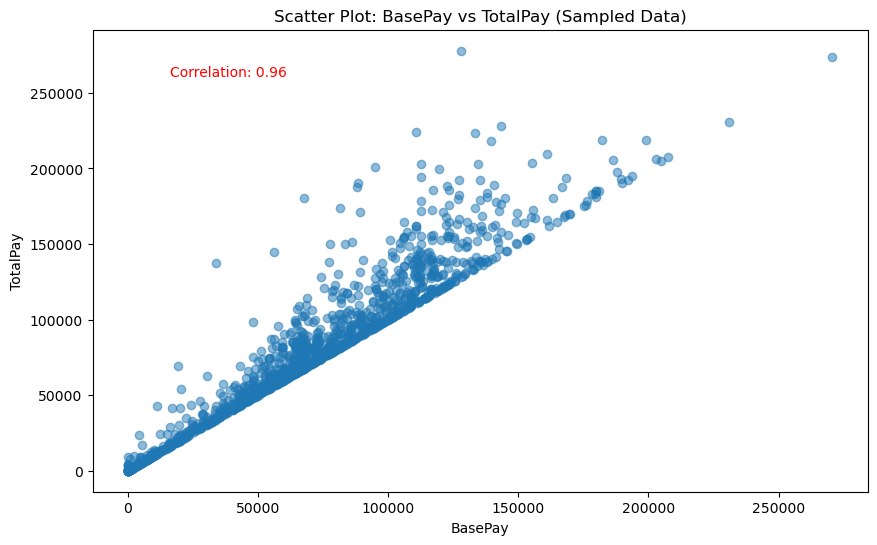

In [49]:

sample_df = df.sample(frac=0.01, random_state=33)

correlation = sample_df['BasePay'].corr(sample_df['TotalPay'])

plt.figure(figsize=(10, 6))
plt.scatter(sample_df['BasePay'], sample_df['TotalPay'], alpha=0.5)
plt.title('Scatter Plot: BasePay vs TotalPay (Sampled Data)')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')

plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, color='red')

plt.show()

### Corr is .96

# The Report

### Summary

Descriptive Statistics:


1. The mean base salary ('BasePay') is approximately 66325.4 , with a standard deviation of 42764.63.
2. the maximum base salary is 319275.01.
3. Transit Operator are the prelavent among all the jobs

Handling Missing Values:

There are missing values in the 'BasePay', 'OvertimePay', 'OtherPay', and 'Benefits' columns.
Imputation using the mean value and dropping rows with nan values was performed to fill missing values

Correlation Analysis:

A correlation analysis was conducted between 'BasePay' and 'TotalPay'.
A scatter plot was created to visually explore the relationship between these two numerical columns.
The correlation coefficient indicates the strength and direction of the linear relationship; in this case, it was found to be 0.96


# Good Luck!